<a href="https://colab.research.google.com/github/Fsrkh/machine-learning-small-projects/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  Importing an Visualzing data

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
fig = px.scatter(df, x = 'Glucose', y = 'BMI', color = 'Outcome')
fig.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"], color="Outcome", height=900)
fig.show()

In [ ]:
fig = px.parallel_coordinates(df, color="Outcome", labels={"Glucose": "Glucose",
                  "BloodPressure": "BloodPressure", "Insulin": "Insulin",
                  "BMI": "BMI", "Age": "Age", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [ ]:
fig = px.scatter(df.query("Pregnancies== 0"  ), x="BMI", y="BloodPressure", size="Insulin", color="Outcome",
           hover_name="Age", log_x=True, size_max=60)
fig.show()

In [ ]:
fig = px.scatter_3d(df, x="BMI", y="BloodPressure", z="Glucose", color="Outcome", size="Insulin", hover_name="Age",
                   color_discrete_map = {'0' : 'pink', '1' : 'purple'})
fig.show()

In [ ]:
X = df.drop('Outcome', axis =1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Machine Learning Models

## K nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)

y_hat = knn_3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_hat, y_test)
print ('The accuracy of knn with 3 neighbors is: ', accuracy)

The accuracy of knn with 3 neighbors is:  0.6948051948051948


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_hat, y_test)
cm

array([[74, 22],
       [25, 33]])

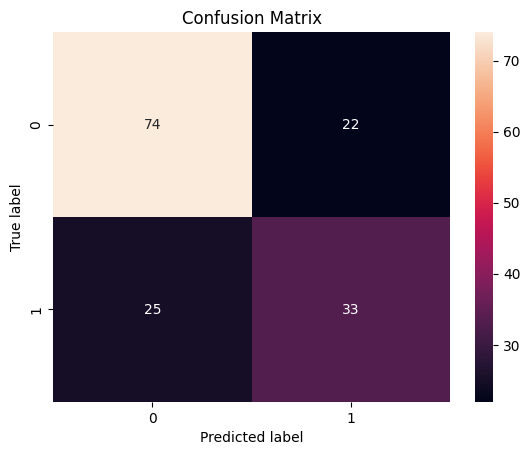

In [ ]:
import seaborn as sns

sns.heatmap(pd.DataFrame(cm), annot=True)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train, y_train)

y_hat = knn_5.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_hat, y_test)
print ('The accuracy of knn with 5 neighbors is: ', accuracy)

The accuracy of knn with 5 neighbors is:  0.7467532467532467


In [ ]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train)

y_hat = knn_7.predict(X_test)

accuracy = accuracy_score(y_hat, y_test)
print ('The accuracy of knn with 7 neighbors is: ', accuracy)

The accuracy of knn with 7 neighbors is:  0.7337662337662337


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_hat = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
accuracy = accuracy_score(y_hat, y_test)
print ('The accuracy of logistic regression is: ', accuracy)

The accuracy of logistic regression is:  0.7922077922077922


In [ ]:
cm = confusion_matrix(y_hat, y_test)
cm

array([[87, 20],
       [12, 35]])

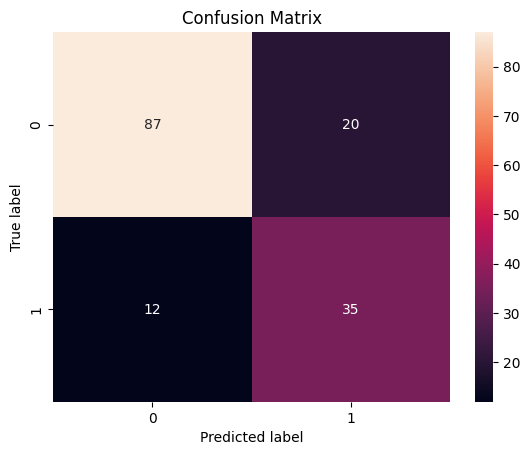

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

## Support Vector Machines

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_hat, y_test)
print ('The accuracy of logistic regression is: ', accuracy)

The accuracy of logistic regression is:  0.7922077922077922


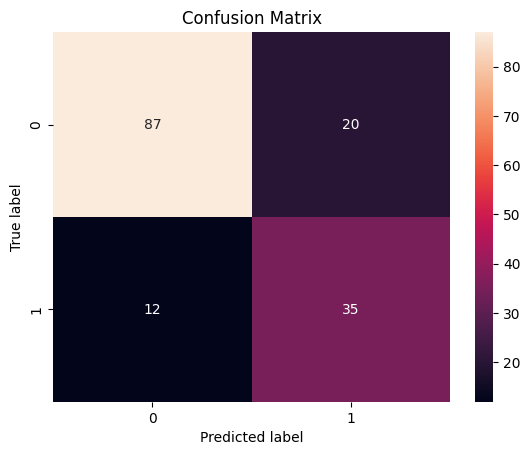

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()